----------------------------------

# <span style="color:green"> 👨‍🏫 statistics <span style ="font-family:Papyrus;"> with python </span>
----------------------------------

<span style="background-color:#F5F5F5"> **🧪 강의 개요** <br> </span> 
- 데이터 분석 및 과학을 위한 핵심 통계지식을 학습합니다.  
- python 을 활용한 통계적 가설검증을 학습합니다.
- 회귀(예측), 분류(지도학습), 클러스터링(비지도학습) 에 대해 이해합니다.
- 실습에는 kaggle dataset 이 사용되었습니다.
- 모든 회차에서 강의내용 핵심요약을 진행합니다. 

<span style="background-color:#F5F5F5"> **🧪 커리큘럼** <br> </span> 
- 1회차: 표본분포, 신뢰구간, 정규분포 - 이론
- 2회차: 가설설정, 통계적 유의성, 가설검정 - 이론
- 3회차: 가설설정, 통계적 유의성, 가설검정 - 실습
- 4회차: 회귀와 예측 - 이론
- 5회차: 회귀와 예측 - 실습
- 6회차: 지도학습과 비지도학습 - 이론 
</span> 
  
-----------------------------------

### <span style="color:darkgreen"> 📗 chapter 1. T-TEST

In [1]:
# 라이브러리 호출 
import pandas as pd
import numpy as np 
# 과학 계산용 파이썬 라이브러리 
import scipy.stats as stats
from PIL import Image

In [2]:
import os
os.getcwd()

'/Users/jun/GitStudy/Data_4/src/session/statistic/week2'

In [3]:
df = pd.read_csv("statistics.csv")

In [4]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


### <span style="color:darkgreen"> 📗 chapter 1. T-TEST: 가설 설정하기 

In [5]:
# 가설 설정
# 귀무가설: 남성과 여성의 평균 구매금액에 차이가 없을 것이다 
# 대립가설: 남성과 여성의 평균 구매금액에 차이가 있을 것이다
# 실제 데이터 비교
df.groupby(['Gender'])['Purchase Amount (USD)'].mean().reset_index()

,Gender,Purchase Amount (USD)
0,Female,60.249199
1,Male,59.536199


In [6]:
# 데이터 분리 
# mask method 
mask=(df['Gender']=='Male')
mask1 = (df['Gender']=='Female')

m_df = df[mask]
f_df = df[mask1]

In [7]:
m_df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,2648,60,Male,Shoes,Footwear,58,South Carolina,M,Red,Summer,3.3,No,2-Day Shipping,No,No,25,Debit Card,Annually
2648,2649,51,Male,Pants,Clothing,84,Illinois,M,Gray,Spring,3.9,No,Next Day Air,No,No,14,PayPal,Bi-Weekly
2649,2650,23,Male,Gloves,Accessories,21,Minnesota,M,Magenta,Fall,3.9,No,Store Pickup,No,No,14,Bank Transfer,Fortnightly
2650,2651,20,Male,Socks,Clothing,35,Oregon,L,Maroon,Summer,4.2,No,Standard,No,No,46,Credit Card,Every 3 Months


In [8]:
# 결제금액 컬럼만 가져오기 
m_df=m_df[['Purchase Amount (USD)']]
f_df=f_df[['Purchase Amount (USD)']]

In [9]:
f_df

,Purchase Amount (USD)
2652,20
2653,36
2654,70
2655,83
2656,76
...,...
3895,28
3896,49
3897,33
3898,77


### <span style="color:darkgreen"> 📗 chapter 1. T-TEST: 가설검정

In [10]:
# scipy 라이브러리를 이용해 t-score 와 pvalue 를 확인할 수 있습니다. 
# t-test 는 표본의 평균(차이 분석)을 알고자 할 때 사용되며, 모집단의 분산을 알 수 없는 경우 주로 사용됩니다. 
t, pvalue=stats.ttest_ind(f_df, m_df)

In [11]:
# t-score 는 그룹 간 얼마나 차이가 있는지에 대한 지표
# t-score 가 크면 그룹 간 차이가 큼을 의미합니다.
# p-value 는 우연에 의해 나타날 확률에 대한 지표입니다.
# p-value가 0.05 보다 크다 = 우연히 일어났을 가능성이 높다 = 연관성이 없다고 추정 
# 여기서 p-value 값은 0.05 보다 크므로, 연관성이 없다고 추정할 수 있습니다. 
# 대립가설 기각 
# 귀무가설 채택 
# 귀무가설: 남성과 여성의 평균 구매금액에 차이가 없을 것이다 
t, pvalue

(array([0.87691521]), array([0.38058674]))

### <span style="color:ORANGE"> 📙 chapter 2. 카이제곱검정: 가설 설정하기

In [12]:
# 가설 설정
# 귀무가설: 성별과 구매Size 에는 관련성이 없을 것이다 (독립적일 것이다)
# 대립가설: 성별과 구매Size 에는 관련성이 있을 것이다 
# 실제 데이터 비교
df.groupby(['Gender','Size'])['Customer ID'].count().reset_index()

,Gender,Size,Customer ID
0,Female,L,337
1,Female,M,590
2,Female,S,187
3,Female,XL,134
4,Male,L,716
5,Male,M,1165
6,Male,S,476
7,Male,XL,295


### <span style="color:orange"> 📙 chapter 2. 카이제곱검정: 빈도표 그리기

In [13]:
#pandas 라이브러리의 crosstab 함수를 통해, 두 범주형 자료의 빈도표를 만들어 주겠습니다.
result = pd.crosstab(df['Gender'], df['Size'])
result

Size,L,M,S,XL
Gender,,,,
Female,337,590,187,134
Male,716,1165,476,295


### <span style="color:orange"> 📙 chapter 2. 카이제곱검정: 가설검정

In [ ]:
# 카이제곱 검정을 stat 함수를 통해 구현
# chi2_contingency를 통해, 카이제곱통계량, p-value를 출력할 수 있습니다.  
stats.chi2_contingency(observed=result)

Chi2ContingencyResult(statistic=np.float64(6.615107840598039), pvalue=np.float64(0.08523181331915766), dof=3, expected_freq=array([[ 336.96,  561.6 ,  212.16,  137.28],
       [ 716.04, 1193.4 ,  450.84,  291.72]]))

In [15]:
# 각 값들을 별도로 보기
# 카이제곱 검정 통계량, pvalue, 자유도를 확인할 수 있습니다. 
stats.chi2_contingency(observed=result)[0]

np.float64(6.615107840598039)

그래서 진짜 관련이 없냐? 도 확인해봐야 하는데

- ~, 
- ~ 
- ~ 도 해보고 
- ~~ 도 있다

In [16]:
# p-value 는 우연에 의해 나타날 확률에 대한 지표입니다.
# p-value가 0.05 보다 크다 = 우연히 일어났을 가능성이 높다 = 인과관계가 없다고 추정 
# 여기서 p-value 값은 0.05 보다 크므로, 연관성이 없다고 추정할 수 있습니다. 
# 대립가설 기각
# 귀무가설 채택
# 귀무가설: 성별과 구매Size 에는 관련성이 없을 것이다 (독립적일 것이다)
stats.chi2_contingency(observed=result)[1]

np.float64(0.08523181331915766)

### <span style="color:orange"> 📙 chapter 2. 카이제곱검정: 가설검정2

In [17]:
#자유도와 유의수준을 통해 귀무가설 기각 여부를 판단하기도 합니다. 
#자유도란, 굉장히 복잡한 개념이므로,,, (변수1 그룹의 수-1)*(변수2 그룹의 수-1) 가 되겠습니다. 
#(성별 2개 - 1 ) * (옷 사이즈 4개 -1 ) 
# 1*3 = 3 이 도출되었습니다. 
stats.chi2_contingency(observed=result)[2]

3

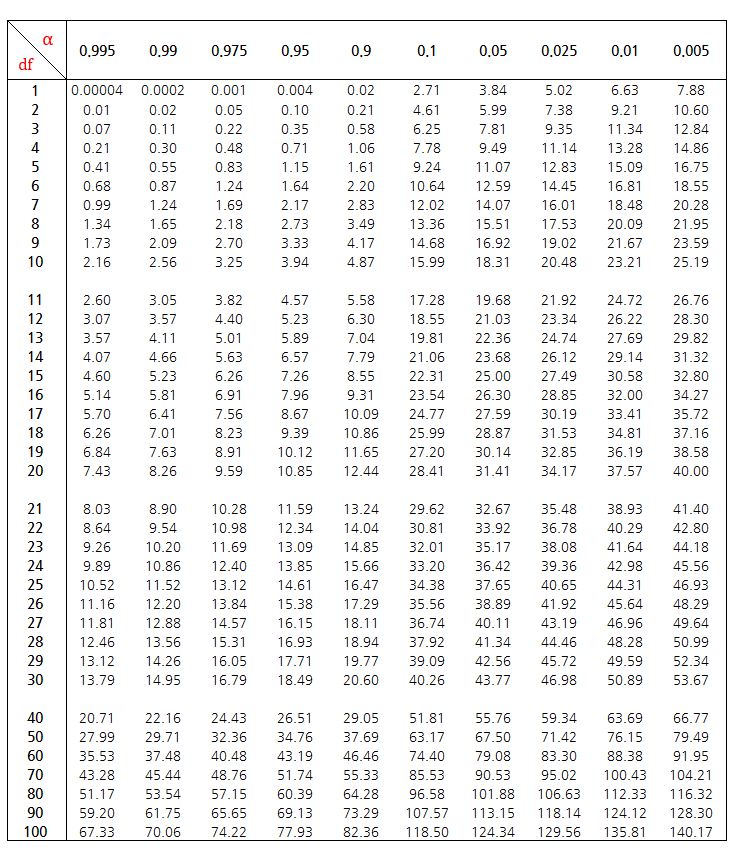

In [18]:
# x 축은 유의수준, y 축은 자유도 입니다. 
# 자유도3, 유의수준을 0.05 로 본다면, 7.81 검정통계량이 나오게 됩니다. 
# 우리가 구한 카이제곱 검정통계량은 6.615 이므로 7.81 보다 작습니다.
# 표에 명시된 기준보다 값이 작을 경우 대립가설을 기각합니다. 
# 대립가설 기각 
# 이렇게까지는 잘 하지 않습니다..p-value 로 판단합니다. 
Image.open('카이제곱분포표.png')

In [19]:
Image.open('욕명수.png')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jun/GitStudy/Data_4/src/session/statistic/week2/욕명수.png'